# Reference
[MDN](http://www.cedar.buffalo.edu/~srihari/CSE574/Chap5/Chap5.7-MixDensityNetworks.pdf)

In [1]:
from utils import *
from NN import *

In [2]:
num_data = 1000

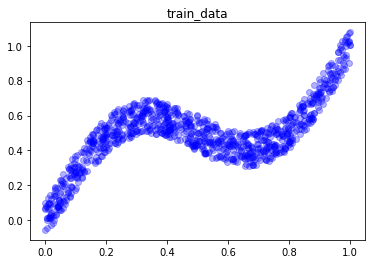

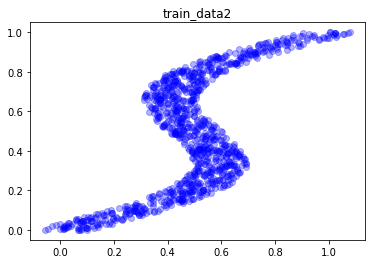

In [3]:
train_data = {}
train_data['x'] = np.random.uniform(0, 1, num_data)
train_data['y'] = function(train_data['x'])
train_data2 = {}
train_data2['x'] = train_data['y']
train_data2['y'] = train_data['x']
test_data = {}
test_data['x'] = np.linspace(0, 1, 100)
test_data['y'] = function(test_data['x'])
test_data2 = {}
test_data2['x'] = test_data['y']
test_data2['y'] = test_data['x']
plt.title("train_data")
plotter(train_data['x'], train_data['y'], option = 'bo', alpha = 0.3)
plt.title("train_data2")
plotter(train_data2['x'], train_data2['y'], 'bo')

# MSE

In [4]:
model = Model_MSE(epoch=600, batch_size = 10, hidden_layers = 20)

## train_data1

cost = 0.003434001002460718


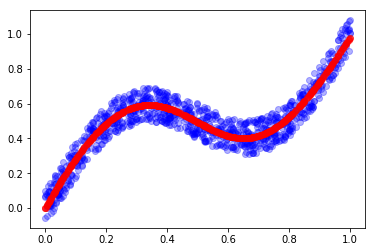

cost = 0.003434001002460718


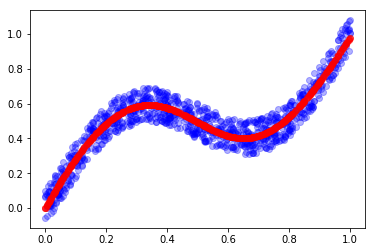

cost = 0.003434001002460718


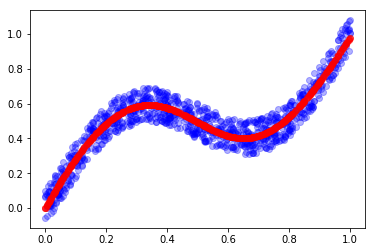

In [5]:
model.run(train_data)

## test_data1

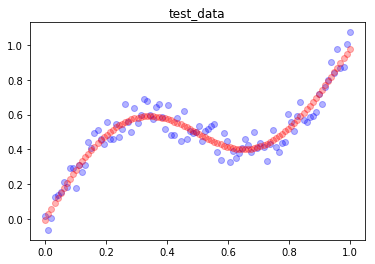

In [6]:
plt.title("test_data")
model.test(test_data)

## train_data2 

0
cost = 0.0484745018184185


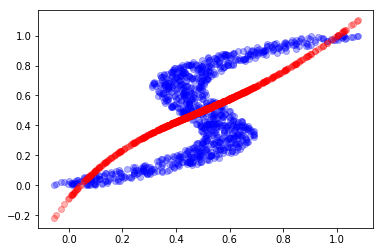

cost = 0.0484745018184185


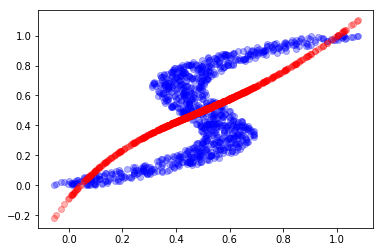

cost = 0.0484745018184185


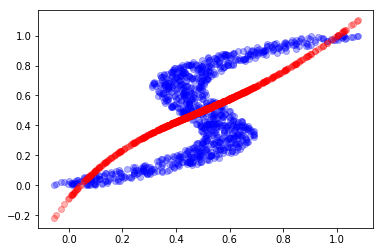

In [7]:
model.reset()
print(model.sess.run(model.global_step))
model.run(train_data2)

## test_data2

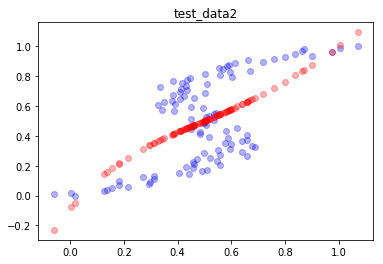

In [8]:
plt.title("test_data2")
model.test(test_data2)

## MDN
There are total $K$ mixtures.  
Let the data   
$x : n$ dims vector
There are total 3 kinds of parameter.  
$\pi = K\times 1$ matrix  
$\sigma = K\times n$ matrix  
>Actually $\Sigma = K\times n\times n$ matrix  
>However, for simplicity suppose Covariance of every components are 0 

$\mu =  K\times n$ matrix

$$p(x|\pi, \sigma , \mu)=\sum_{i=1}^{K} \pi_i p(x|\sigma_i, \mu_i)$$
$$=\sum_{i=1}^{K} \pi_i \mathcal{N}(x|\mu_i, \sigma_i)$$
$$=\sum_{i=1}^{K} \pi_i \prod_{j=1}^{n} \frac{1}{\sqrt{2\pi}\sigma_{ij}}\exp\big{(}-(\frac{x_j-\mu_{ij}}{\sigma_{ij}})^2\big{)} $$ 

Let $X$ be dataset
$$p(X|\pi,\sigma,\mu) = \prod_{x \in X}\sum_{i=1}^{K} \pi_i \prod_{j=1}^{n} \frac{1}{\sqrt{2\pi}\sigma_{ij}}\exp\big{(}-(\frac{x_j-\mu_{ij}}{\sigma_{ij}})^2\big{)} $$

$$\mathrm{cost} = -\ln(p(X|\pi,\sigma,\mu))=-\ln(\prod_{x \in X}\sum_{i=1}^{K} \pi_i \prod_{j=1}^{n} \frac{1}{\sqrt{2\pi}\sigma_{ij}}\exp\big{(}-(\frac{x_j-\mu_{ij}}{\sigma_{ij}})^2\big{)})$$
$$=-\sum_{x \in X}\ln(\sum_{i=1}^{K} \pi_i \prod_{j=1}^{n} \frac{1}{\sqrt{2\pi}\sigma_{ij}}\exp\big{(}-(\frac{x_j-\mu_{ij}}{\sigma_{ij}})^2\big{)})$$

#### 1D case
$$\mathrm{cost} =-\sum_{x \in X}\ln(\sum_{i=1}^{K} \pi_i \frac{1}{\sqrt{2\pi}\sigma_{i}}\exp\big{(}-(\frac{x-\mu_{i}}{\sigma_{i}})^2\big{)})$$

In [9]:
K_mix = 3
model2 = Model_MDN(epoch=1000, batch_size = 20, hidden_layers = 30, K = K_mix)
model2.run(train_data2)

[<tf.Tensor 'gradients_1/split_grad/concat:0' shape=(?, 9) dtype=float32>, None, None]
cost = -0.5192087292671204
cost = -0.5237026810646057
cost = -0.5342434644699097
cost = -0.5459737777709961
cost = -0.5293284058570862
cost = -0.5545195937156677
cost = -0.5559183359146118
cost = -0.5495876669883728
cost = -0.5714505910873413
cost = -0.5674409866333008


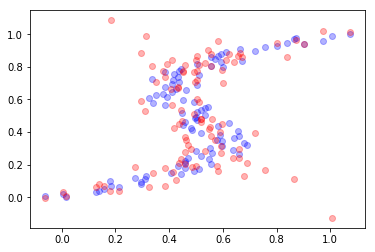

In [10]:
model2.test(test_data2)

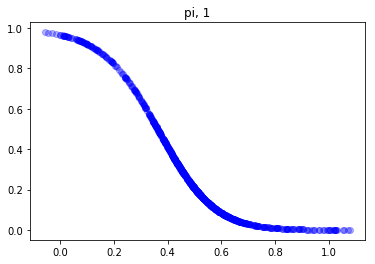

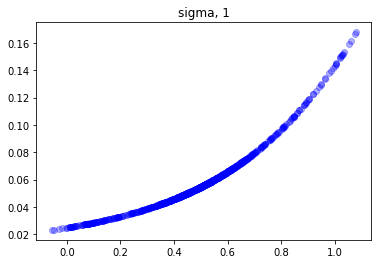

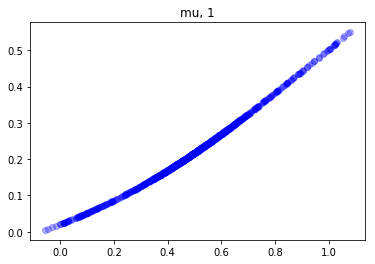

In [11]:
model2.graph(train_data2, 0)

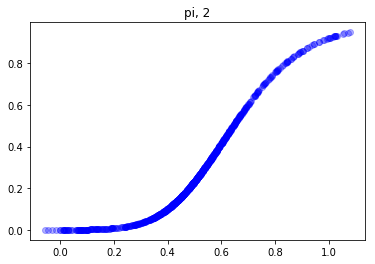

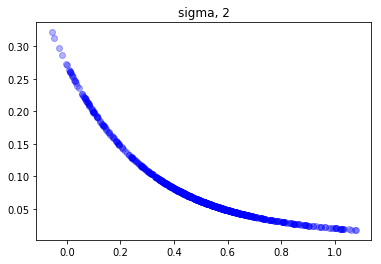

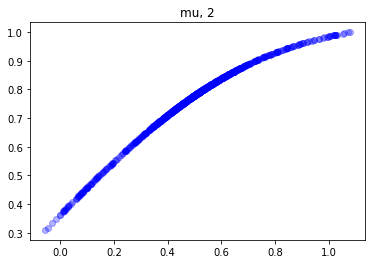

In [12]:
model2.graph(train_data2, 1)

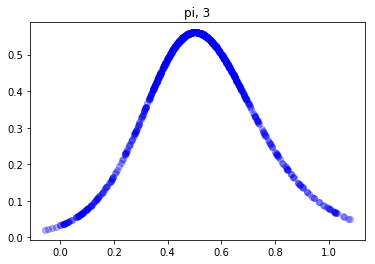

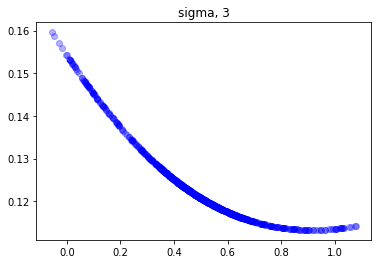

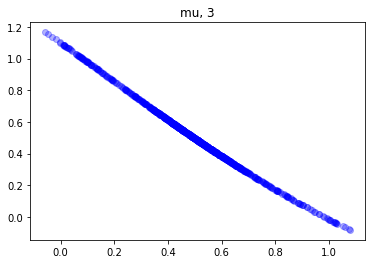

In [13]:
model2.graph(train_data2, 2)